# Import Module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loding Dataset

In [2]:
df = pd.read_csv("data.csv")
df.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the data set

In [5]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [7]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

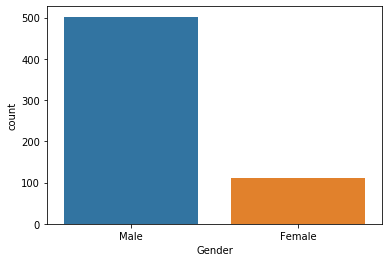

In [9]:
# categorical attributes visualization
sns.countplot(df['Gender'])

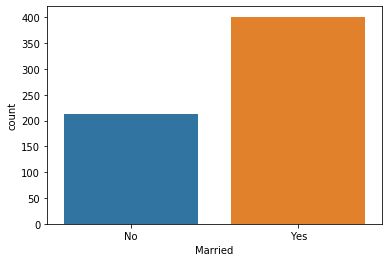

In [10]:
sns.countplot(df['Married'])

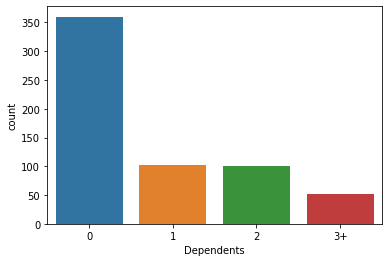

In [11]:
sns.countplot(df['Dependents'])

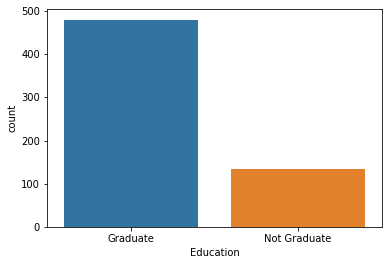

In [12]:
sns.countplot(df['Education'])

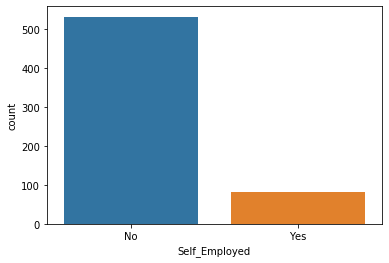

In [13]:
sns.countplot(df['Self_Employed'])

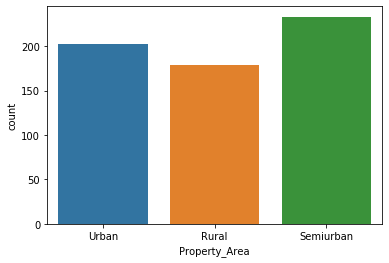

In [14]:
sns.countplot(df['Property_Area'])

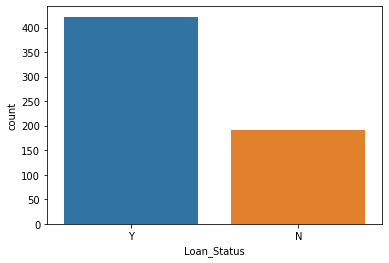

In [15]:
sns.countplot(df['Loan_Status'])

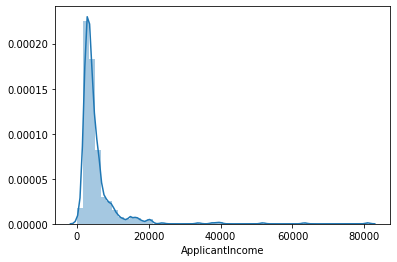

In [16]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

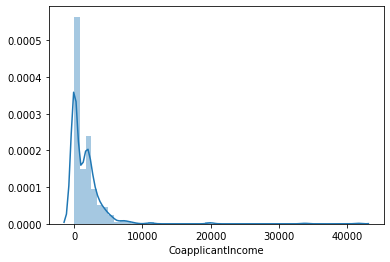

In [17]:
sns.distplot(df["CoapplicantIncome"])

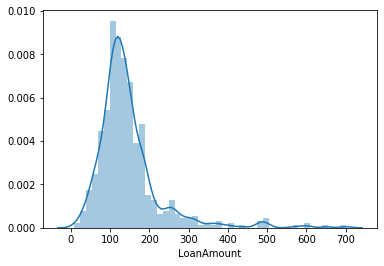

In [18]:
sns.distplot(df["LoanAmount"])

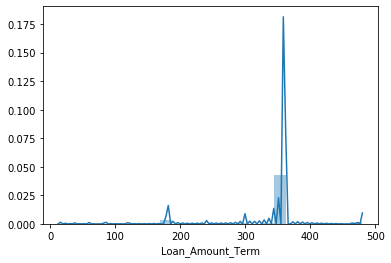

In [19]:
sns.distplot(df['Loan_Amount_Term'],kde_kws={'bw': 0.1})

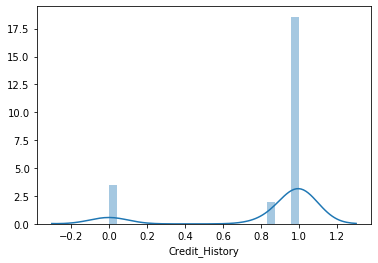

In [20]:
sns.distplot(df['Credit_History'],kde_kws={'bw': 0.1})

## Creation of new attributes

In [21]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Log Transformation

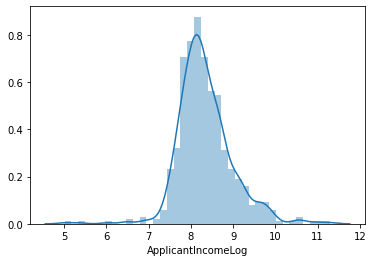

In [22]:
# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df["ApplicantIncomeLog"])

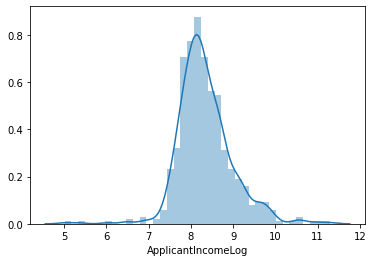

In [23]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.distplot(df["ApplicantIncomeLog"])

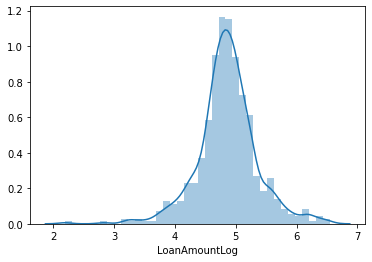

In [24]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmountLog"])

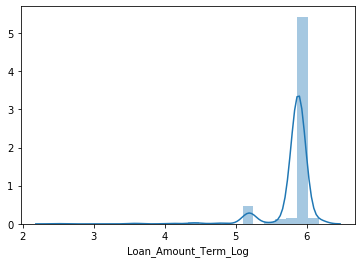

In [25]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term_Log"],kde_kws={'bw': 0.1})

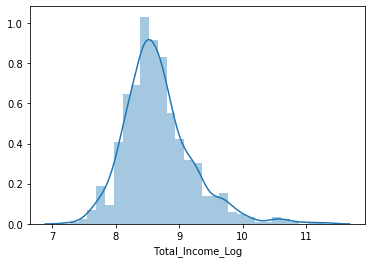

In [26]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df["Total_Income_Log"])

## Coorelation Matrix

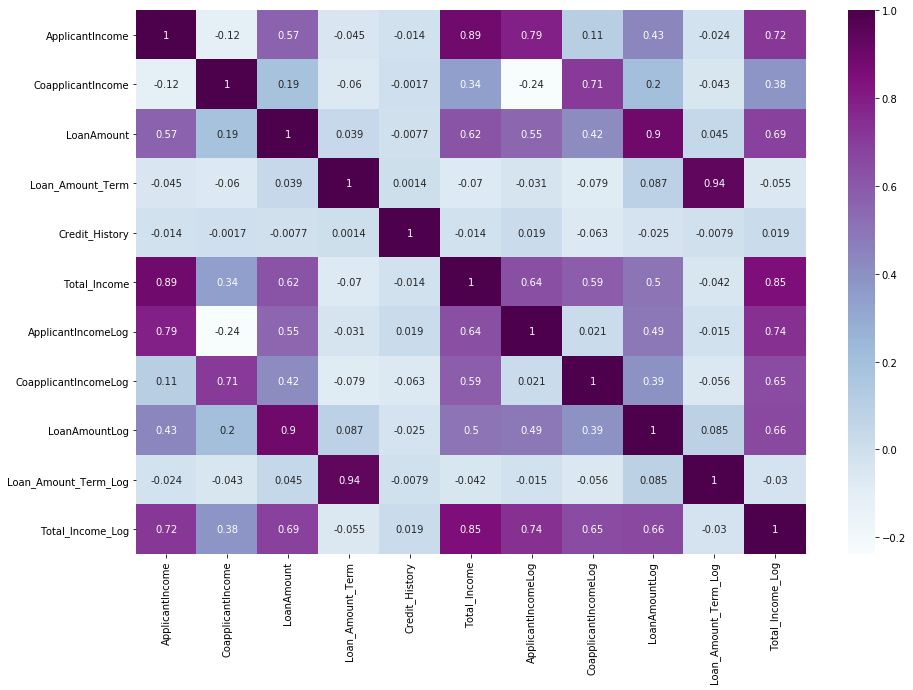

In [27]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [28]:
df.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,No,6782,0.0,146.412162,360.0,0.842199,Urban,N,6782.0,8.822027,-inf,4.986426,5.886104,8.822027
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.000000,360.0,1.000000,Semiurban,Y,4786.0,7.817625,7.741534,4.919981,5.886104,8.473450
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.000000,360.0,1.000000,Semiurban,Y,2974.0,7.589336,6.904751,3.912023,5.886104,7.997663
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.000000,180.0,1.000000,Semiurban,Y,4188.0,8.339979,-inf,4.744932,5.192957,8.339979


In [29]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head(100)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.000000,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.000000,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.000000,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.000000,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.000000,Urban,Y,8.699515,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,No,0,Graduate,No,0.842199,Urban,N,8.822027,4.986426,5.886104,8.822027
96,Female,Yes,0,Graduate,No,1.000000,Semiurban,Y,7.817625,4.919981,5.886104,8.473450
97,Male,Yes,0,Graduate,No,1.000000,Semiurban,Y,7.589336,3.912023,5.886104,7.997663
98,Male,Yes,0,Not Graduate,No,1.000000,Semiurban,Y,8.339979,4.744932,5.192957,8.339979


## Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [31]:
df.head(100)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.000000,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.000000,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.000000,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.000000,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.000000,2,1,8.699515,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,0,0.842199,2,0,8.822027,4.986426,5.886104,8.822027
96,0,1,0,0,0,1.000000,1,1,7.817625,4.919981,5.886104,8.473450
97,1,1,0,0,0,1.000000,1,1,7.589336,3.912023,5.886104,7.997663
98,1,1,0,1,0,1.000000,1,1,8.339979,4.744932,5.192957,8.339979


## Train-Test Split

In [32]:
# fill the missing values for categorical terms - mode
df['Credit_History'] = df["Credit_History"].fillna(df['Credit_History'].mode()[0])
df['LoanAmountLog'] = df["LoanAmountLog"].fillna(df['LoanAmountLog'].mode()[0])
df['Loan_Amount_Term_Log'] = df["Loan_Amount_Term_Log"].fillna(df['Loan_Amount_Term_Log'].mode()[0])


In [33]:
# specify input and output attributes
X = df[['Dependents','Credit_History','LoanAmountLog','Gender','Married','Education','Self_Employed','Property_Area','Total_Income_Log']]
y = df['Loan_Status']


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [35]:
X_train.isnull().sum()

Dependents          0
Credit_History      0
LoanAmountLog       0
Gender              0
Married             0
Education           0
Self_Employed       0
Property_Area       0
Total_Income_Log    0
dtype: int64

## Model Training

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [37]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred_svm= classifier_svm.predict(X_test)
    accuracy_svc = accuracy_score(y_test, y_pred_svm)
    print("Support Vector Classifier: " + str(accuracy_svc * 100))
    cm = confusion_matrix(y_test, y_pred_svm)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")
    print("-"*100)
    print(cm)

In [38]:
def logistic_regression(X_train, X_test, y_train, y_test):
    #logic = LogisticRegression(random_state = 42, C=100)
    logic = LogisticRegression(random_state = 42,max_iter=1000)
    logic.fit(X_train, y_train)

    y_pred_logic= logic.predict(X_test)
    accuracy_logic = accuracy_score(y_test, y_pred_logic)
    print("Logistic Regression: " + str(accuracy_logic * 100))
    cm = confusion_matrix(y_test, y_pred_logic)

    return print(f"Train score : {logic.score(X_train, y_train)}\nTest score : {logic.score(X_test, y_test)}")
    print("-"*100)
    print(cm)

In [39]:

def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred_knn = classifier_knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print("KNN Classifier: " + str(accuracy_knn * 100))

    cm = confusion_matrix(y_test, y_pred_knn)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")
    print("-"*100)
    print(cm)

In [40]:

def naive_classifier(X_train, X_test, y_train, y_test):
    
    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred_naive = classifier_naive.predict(X_test)
    accuracy_naive = accuracy_score(y_test, y_pred_naive)
    print("Naive Classifier: " + str(accuracy_naive * 100))

    cm = confusion_matrix(y_test, y_pred_naive)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")
    print("-"*100)
    print(cm)

In [41]:

def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred_tree = classifier_tree.predict(X_test)
    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    print("Tree Classifier: " + str(accuracy_tree * 100))

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")
    print("-"*100)
    print(cm)

In [42]:

def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred_forest = classifier_forest.predict(X_test)
    accuracy_forest = accuracy_score(y_test, y_pred_forest)
    print("Forest Classifier: " + str(accuracy_forest * 100))
    cm = confusion_matrix(y_test, y_pred_forest)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")
    print("-"*100)
    print(cm)

In [43]:

def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)
    
    print("-"*100)
    print()
    
    print("Lgistic:\n")
    logistic_regression(X_train, X_test, y_train, y_test)
    
    print("-"*100)
    print()
    
    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()


    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)


In [44]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Support Vector Classifier: 75.80645161290323
Train score : 0.8152173913043478
Test score : 0.7580645161290323
----------------------------------------------------------------------------------------------------

Lgistic:

Logistic Regression: 75.80645161290323
Train score : 0.8152173913043478
Test score : 0.7580645161290323
----------------------------------------------------------------------------------------------------

KNN:

KNN Classifier: 70.96774193548387
Train score : 0.8188405797101449
Test score : 0.7096774193548387
----------------------------------------------------------------------------------------------------

Naive:

Naive Classifier: 75.80645161290323
Train score : 0.8134057971014492
Test score : 0.7580645161290323
----------------------------------------------------------------------------------------------------

Random Forest:

Forest Classifier: 75.80645161290323
Train score : 1.0
Test score : 0.7580645161290323


# Hyper Tuning

In [45]:
ranfor = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',random_state = 2)
ranfor.fit(X_train, y_train)
y_pred_ranfor = ranfor.predict(X_test)
ranfor_accuracy_scores = accuracy_score(y_test, y_pred_ranfor)
print(ranfor_accuracy_scores*100)

74.19354838709677


In [46]:
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [47]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.94762095161936


In [48]:
parameters = {
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
    'criterion': ['gini', 'entropy'],
    'max_features':['auto','sqrt'],
    'max_depth': [14, 20, 25, 30],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2],
    'bootstrap':[True, False]
}

In [49]:
from sklearn.model_selection import GridSearchCV
logreg = RandomForestClassifier()

In [50]:
grid_search = GridSearchCV(estimator = logreg,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 2,
                          verbose = 2,
                          n_jobs = -1)

In [51]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 1280 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:  2.7min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [52]:
accuracies = cross_val_score(estimator = ranfor, X = X_train, y = y_train, cv = 10)

print(accuracies.mean(), accuracies.std())

0.8007142857142858 0.038134578516049275


In [53]:
ranfor.fit(X_train,y_train)
y_pred = ranfor.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7, 14],
       [ 2, 39]], dtype=int64)

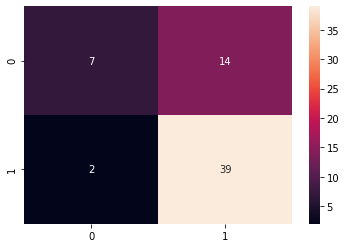

In [54]:
sns.heatmap(cm, annot=True)

## Different Model

In [91]:
logreg = LogisticRegression(random_state = 42, max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
gb = GradientBoostingClassifier(n_estimators = 100,random_state=0)
gb.fit(X_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [94]:
ranfor = RandomForestClassifier( criterion = 'entropy',random_state = 42)
ranfor.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [95]:
knn = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [96]:
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [97]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [98]:
y_pred_ranfor = ranfor.predict(X_test)
y_pred_gradient = gb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_ranfor = ranfor.predict(X_test)

In [102]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_ranfor = accuracy_score(y_test, y_pred_ranfor)
ranfor_accuracy_scores = accuracy_score(y_test, y_pred_ranfor)
gradient_accuracy_scores = accuracy_score(y_test, y_pred_gradient)

In [103]:
print("RandomForest: " + str(ranfor_accuracy_scores*100))
print("GradientBosting Classifier: " + str(gradient_accuracy_scores * 100))
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

RandomForest: 74.19354838709677
GradientBosting Classifier: 75.80645161290323
Logistic Regression: 75.80645161290323
Support Vector Classifier: 75.80645161290323
K Nearest neighbors: 66.12903225806451
Naive Bayes: 75.80645161290323
Random Forest: 74.19354838709677


## Feature Engineering


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    int32  
 1   Married               614 non-null    int32  
 2   Dependents            614 non-null    int32  
 3   Education             614 non-null    int32  
 4   Self_Employed         614 non-null    int32  
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    int32  
 7   Loan_Status           614 non-null    int32  
 8   ApplicantIncomeLog    614 non-null    float64
 9   LoanAmountLog         614 non-null    float64
 10  Loan_Amount_Term_Log  614 non-null    float64
 11  Total_Income_Log      614 non-null    float64
dtypes: float64(5), int32(7)
memory usage: 40.9 KB


In [105]:
feature_names = ['Dependents','Credit_History','LoanAmountLog','Gender','Married','Education','Self_Employed','Property_Area','Total_Income_Log']

### Random Forest

In [106]:
ranfor.feature_importances_

array([0.05943242, 0.25375032, 0.25952721, 0.02557498, 0.02822974,
       0.02574262, 0.02481997, 0.05505301, 0.26786974])

Text(0.5, 0, 'Random Forest Feature Importance')

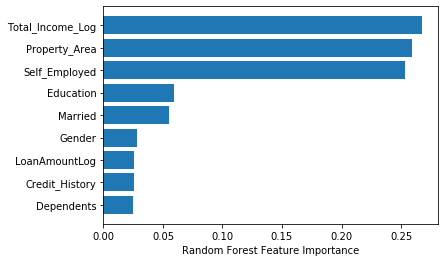

In [107]:
sorted_idx = ranfor.feature_importances_.argsort()
plt.barh(feature_names, ranfor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Gradient Booster

Text(0.5, 0, 'Gradient booster classifier Feature Importance')

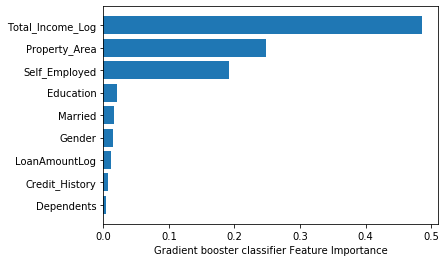

In [108]:
sorted_idx = gb.feature_importances_.argsort()
plt.barh(feature_names, gb.feature_importances_[sorted_idx])
plt.xlabel("Gradient booster classifier Feature Importance")

## K_NN

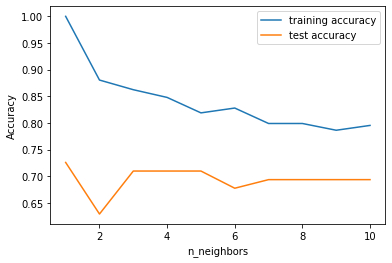

In [109]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Logistic Regression

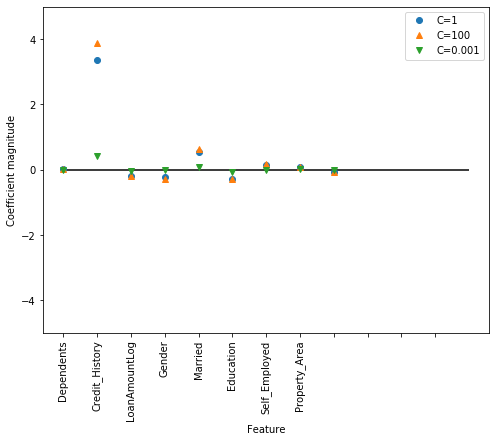

In [110]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
loan_features = [x for i,x in enumerate(feature_names) if i!=8]
plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(df.shape[1]), loan_features, rotation=90)
plt.hlines(0, 0, df.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

# Data Visualization

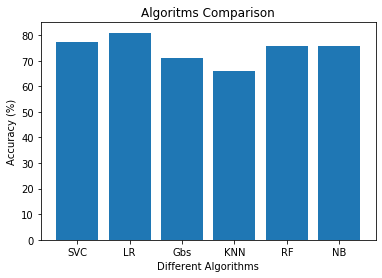

In [66]:
labels = ["SVC", "LR", "Gbs", "KNN","RF","NB"]
usage = [77.41, 80.94, 70.96, 66.12, 75.80, 75.80]

# Generating the y positions. Later, we'll use them to replace them with labels.
y_positions = range(len(labels))

# Creating our bar plot
plt.bar(y_positions, usage)
plt.xticks(y_positions, labels)
plt.xlabel("Different Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Algoritms Comparison")
plt.show()

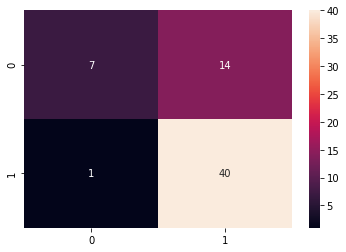

In [67]:
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(pd.DataFrame(cm), annot=True)

**Classification Report (Accuracy, Precision, Recall, F1-score)**

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test, y_pred_gradient))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55        21
           1       0.76      0.93      0.84        41

    accuracy                           0.76        62
   macro avg       0.76      0.68      0.69        62
weighted avg       0.76      0.76      0.74        62



In [70]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.66      1.00      0.80        41

    accuracy                           0.66        62
   macro avg       0.33      0.50      0.40        62
weighted avg       0.44      0.66      0.53        62



In [71]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.88      0.33      0.48        21
           1       0.74      0.98      0.84        41

    accuracy                           0.76        62
   macro avg       0.81      0.65      0.66        62
weighted avg       0.79      0.76      0.72        62



In [72]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.88      0.33      0.48        21
           1       0.74      0.98      0.84        41

    accuracy                           0.76        62
   macro avg       0.81      0.65      0.66        62
weighted avg       0.79      0.76      0.72        62



In [73]:
print(classification_report(y_test, y_pred_ranfor))

              precision    recall  f1-score   support

           0       0.78      0.33      0.47        21
           1       0.74      0.95      0.83        41

    accuracy                           0.74        62
   macro avg       0.76      0.64      0.65        62
weighted avg       0.75      0.74      0.71        62



In [74]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.33      0.48        21
           1       0.74      0.98      0.84        41

    accuracy                           0.76        62
   macro avg       0.81      0.65      0.66        62
weighted avg       0.79      0.76      0.72        62



In [75]:
precision = [0.73,0.66,0.77,0.74,0.74,0.75]
recall = [0.90,1.00,1.00,0.98,0.98,1.00]
f1_score = [0.80,0.80,0.86,0.84,0.84,0.85]

names_al = ['Gbs','KNN','Logreg','NBs','Forest','SVC']

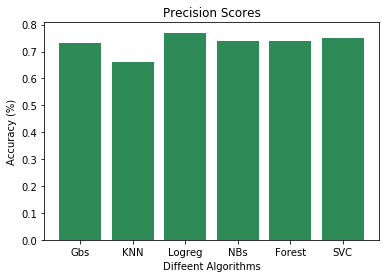

In [76]:
plt.bar(names_al, precision,color=['seagreen'])
plt.xlabel("Diffeent Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Precision Scores")
plt.show()

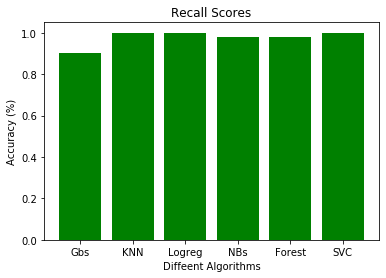

In [77]:
plt.bar(names_al, recall,color=['green'])
plt.xlabel("Diffeent Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Recall Scores")
plt.show()

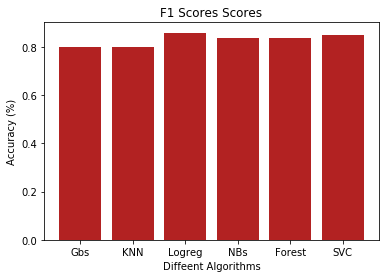

In [78]:
plt.bar(names_al, f1_score,color=['firebrick'])
plt.xlabel("Diffeent Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("F1 Scores Scores")
plt.show()

# K-Fold Cross Validation

In [89]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,7.972466,4.262680,5.886104,7.972466
610,1,1,3,0,0,1.0,0,1,8.320205,3.688879,5.192957,8.320205
611,1,1,1,0,0,1.0,2,1,8.996157,5.533389,5.886104,9.025456
612,1,1,2,0,0,1.0,2,1,8.933664,5.231109,5.886104,8.933664


In [80]:
from sklearn.model_selection import KFold
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# create model
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print(scores.mean()*100, scores.std()*100)

80.25324675324676 6.268988695256852


In [81]:
from sklearn.model_selection import KFold
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# create model
logreg = LogisticRegression()
# evaluate model
scores = cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(scores.mean()*100, scores.std()*100)

81.52272727272727 4.98831595701694


In [82]:
from sklearn.model_selection import KFold
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# create model
model = SVC()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(scores.mean()*100, scores.std()*100)

81.52272727272727 4.98831595701694


In [83]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# create model
model = GaussianNB()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(scores.mean()*100, scores.std()*100)

81.1590909090909 5.019695775025284


In [84]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# create model
model = KNeighborsClassifier()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(scores.mean()*100, scores.std()*100)

75.16883116883118 7.353187231107753


In [85]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# create model
model =   GradientBoostingClassifier()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(scores.mean()*100, scores.std()*100)

80.07467532467534 4.6531773865669965


## Saving As a Pickle File

In [111]:
filename = 'loan_pickle.pkl'
pickle.dump(logreg, open(filename, 'wb'))

In [112]:
model = open('loan_pickle.pkl','rb')
forest = pickle.load(model)